# Python Project for determining the Rate of Heart disease.
Import the files that are necessary for the implementation of the problem statement.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

Import the train and test dataset

In [2]:
train=pd.read_csv('C:\\Users\\WIN\\Desktop\\Welingkar\\Competitions\\Roorkee\\Training_dataset.csv')

In [3]:
test=pd.read_csv('C:\\Users\\WIN\\Desktop\\Welingkar\\Competitions\\Roorkee\\Test_dataset.csv')

In [4]:
y_train=pd.read_csv('C:\\Users\\WIN\\Desktop\\Welingkar\\Competitions\\Roorkee\\Training_Label.csv')

Determine the dimensions of the tables

In [5]:
train.shape, test.shape

((3198, 34), (3080, 34))

Determine the data types of the different columns

In [6]:
train.dtypes

row_id                                                int64
area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school

Study the type of data stored in each column.

In [7]:
train.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a
2,2,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b
3,3,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,...,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b
4,4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,...,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a


Make dummy variables for the categorical variables

In [8]:
dummy=pd.get_dummies(train['yr'],drop_first=True)

In [9]:
dummy.head()

,b
0,0
1,0
2,1
3,1
4,0


Concatenate the dummy variables with the original dataset and drop the categorical column

In [10]:
train=pd.concat([train,dummy],axis=1)

In [11]:
train.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,b
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,0
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,0
2,2,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,1
3,3,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,...,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,1
4,4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,...,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,0


In [12]:
train=train.drop(columns=['yr'])

In [13]:
train.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,b
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,0
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,0
2,2,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,1
3,3,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,...,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,1
4,4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,...,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,0


In [14]:
dummy=pd.get_dummies(train['area__rucc'],drop_first=True)

In [15]:
dummy.head()

,"Metro - Counties in metro areas of 250,000 to 1 million population","Metro - Counties in metro areas of fewer than 250,000 population","Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area","Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area","Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area","Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area","Nonmetro - Urban population of 20,000 or more, adjacent to a metro area","Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area"
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0


In [16]:
train=pd.concat([train,dummy],axis=1)

In [17]:
dummy=pd.get_dummies(train['area__urban_influence'],drop_first=True)

In [18]:
train=pd.concat([train,dummy],axis=1)

In [19]:
dummy=pd.get_dummies(train['econ__economic_typology'],drop_first=True)

In [20]:
train=pd.concat([train,dummy],axis=1)

In [21]:
train.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,"Noncore adjacent to micro area and contains a town of 2,500-19,999 residents","Noncore adjacent to micro area and does not contain a town of at least 2,500 residents","Noncore not adjacent to a metro/micro area and contains a town of 2,500 or more residents","Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",Small-in a metro area with fewer than 1 million residents,Federal/State government-dependent,Manufacturing-dependent,Mining-dependent,Nonspecialized,Recreation
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,0,0,0,0,1,0,1,0,0,0
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0,0,0,0,1,0,0,1,0,0
2,2,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0,0,0,0,0,0,0,0,1,0
3,3,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,...,0,0,0,0,0,0,0,0,1,0
4,4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,...,0,0,1,0,0,0,0,0,1,0


In [22]:
train.columns

Index(['row_id', 'area__rucc', 'area__urban_influence',
       'econ__economic_typology', 'econ__pct_civilian_labor',
       'econ__pct_unemployment', 'econ__pct_uninsured_adults',
       'econ__pct_uninsured_children', 'demo__pct_female',
       'demo__pct_below_18_years_of_age', 'demo__pct_aged_65_years_and_older',
       'demo__pct_hispanic', 'demo__pct_non_hispanic_african_american',
       'demo__pct_non_hispanic_white',
       'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian',
       'demo__pct_adults_less_than_a_high_school_diploma',
       'demo__pct_adults_with_high_school_diploma',
       'demo__pct_adults_with_some_college',
       'demo__pct_adults_bachelors_or_higher', 'demo__birth_rate_per_1k',
       'demo__death_rate_per_1k', 'health__pct_adult_obesity',
       'health__pct_adult_smoking', 'health__pct_diabetes',
       'health__pct_low_birthweight', 'health__pct_excessive_drinking',
       'health__pct_physical_inacticity',
       'health__air_pollution_

In [23]:
train=train.drop(columns=['area__rucc','area__urban_influence','econ__economic_typology'])

In [24]:
train.dtypes

row_id                                                                                                  int64
econ__pct_civilian_labor                                                                              float64
econ__pct_unemployment                                                                                float64
econ__pct_uninsured_adults                                                                            float64
econ__pct_uninsured_children                                                                          float64
demo__pct_female                                                                                      float64
demo__pct_below_18_years_of_age                                                                       float64
demo__pct_aged_65_years_and_older                                                                     float64
demo__pct_hispanic                                                                                    float64
demo__pct_

Check the columns for missing values.

In [25]:
train.isnull().sum()

row_id                                                                                                   0
econ__pct_civilian_labor                                                                                 0
econ__pct_unemployment                                                                                   0
econ__pct_uninsured_adults                                                                               2
econ__pct_uninsured_children                                                                             2
demo__pct_female                                                                                         2
demo__pct_below_18_years_of_age                                                                          2
demo__pct_aged_65_years_and_older                                                                        2
demo__pct_hispanic                                                                                       2
demo__pct_non_hispanic_african_americ

Drop all the variables with more than 10% Missing value

In [26]:
Train=train.drop(['health__pct_adult_smoking',
                  'health__pct_excessive_drinking',
                  'health__homicides_per_100k',
                  'health__motor_vehicle_crash_deaths_per_100k',
                  'health__pop_per_dentist',
                  'health__pop_per_primary_care_physician'],axis=1)

In [27]:
Train.head()

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,"Noncore adjacent to micro area and contains a town of 2,500-19,999 residents","Noncore adjacent to micro area and does not contain a town of at least 2,500 residents","Noncore not adjacent to a metro/micro area and contains a town of 2,500 or more residents","Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",Small-in a metro area with fewer than 1 million residents,Federal/State government-dependent,Manufacturing-dependent,Mining-dependent,Nonspecialized,Recreation
0,0,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,...,0,0,0,0,1,0,1,0,0,0
1,1,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,...,0,0,0,0,1,0,0,1,0,0
2,2,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,...,0,0,0,0,0,0,0,0,1,0
3,3,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,...,0,0,0,0,0,0,0,0,1,0
4,4,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,...,0,0,1,0,0,0,0,0,1,0


In [28]:
Train.dtypes

row_id                                                                                                  int64
econ__pct_civilian_labor                                                                              float64
econ__pct_unemployment                                                                                float64
econ__pct_uninsured_adults                                                                            float64
econ__pct_uninsured_children                                                                          float64
demo__pct_female                                                                                      float64
demo__pct_below_18_years_of_age                                                                       float64
demo__pct_aged_65_years_and_older                                                                     float64
demo__pct_hispanic                                                                                    float64
demo__pct_

In [29]:
Train.isnull().sum()

row_id                                                                                                  0
econ__pct_civilian_labor                                                                                0
econ__pct_unemployment                                                                                  0
econ__pct_uninsured_adults                                                                              2
econ__pct_uninsured_children                                                                            2
demo__pct_female                                                                                        2
demo__pct_below_18_years_of_age                                                                         2
demo__pct_aged_65_years_and_older                                                                       2
demo__pct_hispanic                                                                                      2
demo__pct_non_hispanic_african_american       

Drop the rows with more than 10% missing values

In [30]:
train.drop([1089])

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,"Noncore adjacent to micro area and contains a town of 2,500-19,999 residents","Noncore adjacent to micro area and does not contain a town of at least 2,500 residents","Noncore not adjacent to a metro/micro area and contains a town of 2,500 or more residents","Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",Small-in a metro area with fewer than 1 million residents,Federal/State government-dependent,Manufacturing-dependent,Mining-dependent,Nonspecialized,Recreation
0,0,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,...,0,0,0,0,1,0,1,0,0,0
1,1,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,...,0,0,0,0,1,0,0,1,0,0
2,2,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,...,0,0,0,0,0,0,0,0,1,0
3,3,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,...,0,0,0,0,0,0,0,0,1,0
4,4,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,...,0,0,1,0,0,0,0,0,1,0
5,5,0.501,0.048,0.212,0.055,0.516,0.207,0.121,0.022,0.046,...,0,0,0,0,0,1,0,0,0,0
6,6,0.462,0.088,0.180,0.039,0.507,0.221,0.167,0.034,0.002,...,0,0,0,0,0,0,0,0,1,0
7,7,0.425,0.077,0.252,0.079,0.499,0.247,0.134,0.053,0.224,...,0,0,0,0,1,0,1,0,0,0
8,8,0.313,0.111,0.275,0.063,0.473,0.248,0.110,0.015,0.719,...,0,0,0,0,0,0,0,0,1,0
9,9,0.371,0.044,0.241,0.110,0.489,0.347,0.121,0.014,0.000,...,0,0,0,1,0,0,0,0,0,0


In [31]:
train.drop([1250])

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,"Noncore adjacent to micro area and contains a town of 2,500-19,999 residents","Noncore adjacent to micro area and does not contain a town of at least 2,500 residents","Noncore not adjacent to a metro/micro area and contains a town of 2,500 or more residents","Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",Small-in a metro area with fewer than 1 million residents,Federal/State government-dependent,Manufacturing-dependent,Mining-dependent,Nonspecialized,Recreation
0,0,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,...,0,0,0,0,1,0,1,0,0,0
1,1,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,...,0,0,0,0,1,0,0,1,0,0
2,2,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,...,0,0,0,0,0,0,0,0,1,0
3,3,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,...,0,0,0,0,0,0,0,0,1,0
4,4,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,...,0,0,1,0,0,0,0,0,1,0
5,5,0.501,0.048,0.212,0.055,0.516,0.207,0.121,0.022,0.046,...,0,0,0,0,0,1,0,0,0,0
6,6,0.462,0.088,0.180,0.039,0.507,0.221,0.167,0.034,0.002,...,0,0,0,0,0,0,0,0,1,0
7,7,0.425,0.077,0.252,0.079,0.499,0.247,0.134,0.053,0.224,...,0,0,0,0,1,0,1,0,0,0
8,8,0.313,0.111,0.275,0.063,0.473,0.248,0.110,0.015,0.719,...,0,0,0,0,0,0,0,0,1,0
9,9,0.371,0.044,0.241,0.110,0.489,0.347,0.121,0.014,0.000,...,0,0,0,1,0,0,0,0,0,0


In [32]:
Train.drop([1091,1250])

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,"Noncore adjacent to micro area and contains a town of 2,500-19,999 residents","Noncore adjacent to micro area and does not contain a town of at least 2,500 residents","Noncore not adjacent to a metro/micro area and contains a town of 2,500 or more residents","Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",Small-in a metro area with fewer than 1 million residents,Federal/State government-dependent,Manufacturing-dependent,Mining-dependent,Nonspecialized,Recreation
0,0,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,...,0,0,0,0,1,0,1,0,0,0
1,1,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,...,0,0,0,0,1,0,0,1,0,0
2,2,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,...,0,0,0,0,0,0,0,0,1,0
3,3,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,...,0,0,0,0,0,0,0,0,1,0
4,4,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,...,0,0,1,0,0,0,0,0,1,0
5,5,0.501,0.048,0.212,0.055,0.516,0.207,0.121,0.022,0.046,...,0,0,0,0,0,1,0,0,0,0
6,6,0.462,0.088,0.180,0.039,0.507,0.221,0.167,0.034,0.002,...,0,0,0,0,0,0,0,0,1,0
7,7,0.425,0.077,0.252,0.079,0.499,0.247,0.134,0.053,0.224,...,0,0,0,0,1,0,1,0,0,0
8,8,0.313,0.111,0.275,0.063,0.473,0.248,0.110,0.015,0.719,...,0,0,0,0,0,0,0,0,1,0
9,9,0.371,0.044,0.241,0.110,0.489,0.347,0.121,0.014,0.000,...,0,0,0,1,0,0,0,0,0,0


In [33]:
Train.isnull().sum()

row_id                                                                                                  0
econ__pct_civilian_labor                                                                                0
econ__pct_unemployment                                                                                  0
econ__pct_uninsured_adults                                                                              2
econ__pct_uninsured_children                                                                            2
demo__pct_female                                                                                        2
demo__pct_below_18_years_of_age                                                                         2
demo__pct_aged_65_years_and_older                                                                       2
demo__pct_hispanic                                                                                      2
demo__pct_non_hispanic_african_american       

# Impute the missing values with median.
We impute the missing values with median as it takes care of the outliers

In [34]:
from statistics import median

In [35]:
median(Train['econ__pct_uninsured_adults'])

0.193

In [36]:
median(Train['econ__pct_uninsured_children'])

0.07200000000000001

In [37]:
median(Train['demo__pct_female'])

0.442

In [38]:
median(Train['demo__pct_below_18_years_of_age'])

0.19899999999999998

In [39]:
median(Train['demo__pct_aged_65_years_and_older'])

0.159

In [40]:
median(Train['demo__pct_hispanic'])

0.037000000000000005

In [41]:
median(Train['demo__pct_non_hispanic_african_american'])

0.026000000000000002

In [42]:
median(Train['demo__pct_non_hispanic_white'])

0.4245

In [43]:
median(Train['demo__pct_american_indian_or_alaskan_native'])

0.006999999999999999

In [44]:
median(Train['demo__pct_asian'])

0.006999999999999999

In [45]:
median(Train['health__pct_adult_obesity'])

0.307

In [46]:
median(Train['health__pct_diabetes'])

0.08800000000000001

In [47]:
median(Train['health__pct_low_birthweight'])

nan

In [48]:
Train.drop(['health__pct_low_birthweight'],axis=1)

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,"Noncore adjacent to micro area and contains a town of 2,500-19,999 residents","Noncore adjacent to micro area and does not contain a town of at least 2,500 residents","Noncore not adjacent to a metro/micro area and contains a town of 2,500 or more residents","Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",Small-in a metro area with fewer than 1 million residents,Federal/State government-dependent,Manufacturing-dependent,Mining-dependent,Nonspecialized,Recreation
0,0,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,...,0,0,0,0,1,0,1,0,0,0
1,1,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,...,0,0,0,0,1,0,0,1,0,0
2,2,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,...,0,0,0,0,0,0,0,0,1,0
3,3,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,...,0,0,0,0,0,0,0,0,1,0
4,4,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,...,0,0,1,0,0,0,0,0,1,0
5,5,0.501,0.048,0.212,0.055,0.516,0.207,0.121,0.022,0.046,...,0,0,0,0,0,1,0,0,0,0
6,6,0.462,0.088,0.180,0.039,0.507,0.221,0.167,0.034,0.002,...,0,0,0,0,0,0,0,0,1,0
7,7,0.425,0.077,0.252,0.079,0.499,0.247,0.134,0.053,0.224,...,0,0,0,0,1,0,1,0,0,0
8,8,0.313,0.111,0.275,0.063,0.473,0.248,0.110,0.015,0.719,...,0,0,0,0,0,0,0,0,1,0
9,9,0.371,0.044,0.241,0.110,0.489,0.347,0.121,0.014,0.000,...,0,0,0,1,0,0,0,0,0,0


In [49]:
median(Train['health__pct_physical_inacticity'])

0.217

In [50]:
median(Train['health__air_pollution_particulate_matter'])

8.0

In [51]:
Train['econ__pct_uninsured_adults'].fillna(0.193,inplace=True)

In [52]:
Train['econ__pct_uninsured_children'].fillna(median(Train['econ__pct_uninsured_children']),inplace=True)

In [53]:
Train['demo__pct_female'].fillna(median(Train['demo__pct_female']),inplace=True)

In [54]:
Train['demo__pct_below_18_years_of_age'].fillna(median(Train['demo__pct_below_18_years_of_age']),inplace=True)

In [55]:
Train['demo__pct_aged_65_years_and_older'].fillna(median(Train['demo__pct_aged_65_years_and_older']),inplace=True)

In [56]:
Train['demo__pct_hispanic'].fillna(median(Train['demo__pct_hispanic']),inplace=True)

In [57]:
Train['demo__pct_non_hispanic_african_american'].fillna(median(Train['demo__pct_non_hispanic_african_american']),inplace=True)

In [58]:
Train['demo__pct_non_hispanic_white'].fillna(median(Train['demo__pct_non_hispanic_white']),inplace=True)

In [59]:
Train['demo__pct_american_indian_or_alaskan_native'].fillna(median(Train['demo__pct_american_indian_or_alaskan_native']),inplace=True)

In [60]:
Train['demo__pct_asian'].fillna(median(Train['demo__pct_asian']),inplace=True)

In [61]:
Train['health__pct_adult_obesity'].fillna(median(Train['health__pct_adult_obesity']),inplace=True)

In [62]:
Train['health__pct_diabetes'].fillna(median(Train['health__pct_diabetes']),inplace=True)

In [63]:
Train['health__pct_physical_inacticity'].fillna(median(Train['health__pct_physical_inacticity']),inplace=True)

In [64]:
Train['health__air_pollution_particulate_matter'].fillna(median(Train['health__air_pollution_particulate_matter']),inplace=True)

In [65]:
Train.isnull().sum()

row_id                                                                                                  0
econ__pct_civilian_labor                                                                                0
econ__pct_unemployment                                                                                  0
econ__pct_uninsured_adults                                                                              0
econ__pct_uninsured_children                                                                            0
demo__pct_female                                                                                        0
demo__pct_below_18_years_of_age                                                                         0
demo__pct_aged_65_years_and_older                                                                       0
demo__pct_hispanic                                                                                      0
demo__pct_non_hispanic_african_american       

In [66]:
Train=Train.drop(['health__pct_low_birthweight'],axis=1)

In [67]:
Train.isnull().sum()

row_id                                                                                                0
econ__pct_civilian_labor                                                                              0
econ__pct_unemployment                                                                                0
econ__pct_uninsured_adults                                                                            0
econ__pct_uninsured_children                                                                          0
demo__pct_female                                                                                      0
demo__pct_below_18_years_of_age                                                                       0
demo__pct_aged_65_years_and_older                                                                     0
demo__pct_hispanic                                                                                    0
demo__pct_non_hispanic_african_american                         

# Data Visualization
Visualizing the data using graphs.

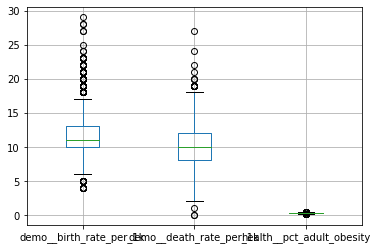

In [68]:
X = train.boxplot( column =['demo__birth_rate_per_1k','demo__death_rate_per_1k','health__pct_adult_obesity'])

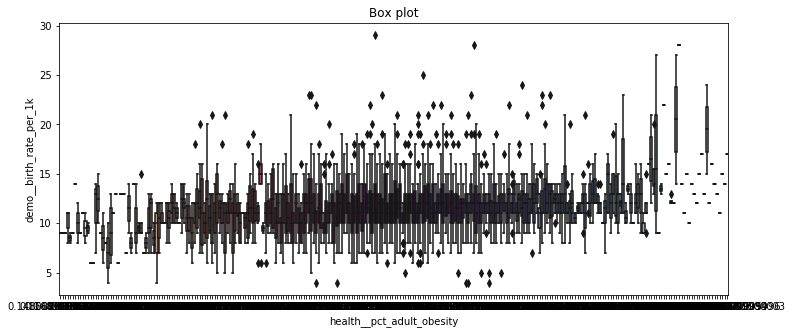

In [69]:
plt.figure(figsize=(12,5))
plt.title("Box plot")
sn.boxplot(y="demo__birth_rate_per_1k", x="health__pct_adult_obesity", data = train , palette = 'twilight_r')
plt.show()

<Figure size 432x288 with 0 Axes>

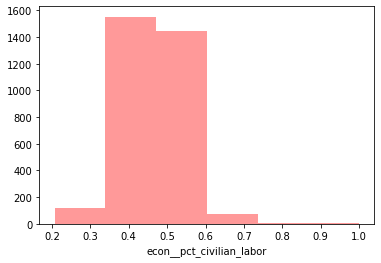

<Figure size 432x288 with 0 Axes>

In [70]:
sn.distplot(train['econ__pct_civilian_labor'].dropna(), kde=False, bins=6, color='Red')
plt.figure(2)

Draw the heatmap to find out the relation between the variables.

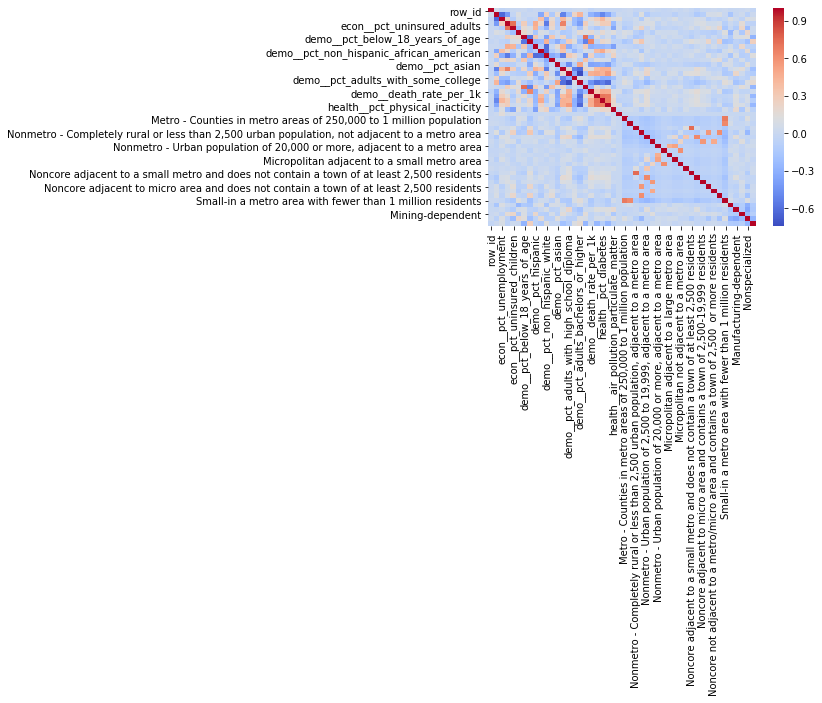

In [71]:
sn.heatmap(Train.corr(),cmap='coolwarm')

Determine the correlation between different variables through corr function.

In [72]:
corr=Train.corr()
print(corr)

                                                      row_id  \
row_id                                              1.000000   
econ__pct_civilian_labor                            0.044911   
econ__pct_unemployment                             -0.039149   
econ__pct_uninsured_adults                         -0.015818   
econ__pct_uninsured_children                       -0.001786   
demo__pct_female                                    0.006071   
demo__pct_below_18_years_of_age                     0.009672   
demo__pct_aged_65_years_and_older                  -0.023708   
demo__pct_hispanic                                  0.001749   
demo__pct_non_hispanic_african_american            -0.002885   
demo__pct_non_hispanic_white                       -0.006676   
demo__pct_american_indian_or_alaskan_native         0.011688   
demo__pct_asian                                     0.018313   
demo__pct_adults_less_than_a_high_school_diploma   -0.032091   
demo__pct_adults_with_high_school_diplom

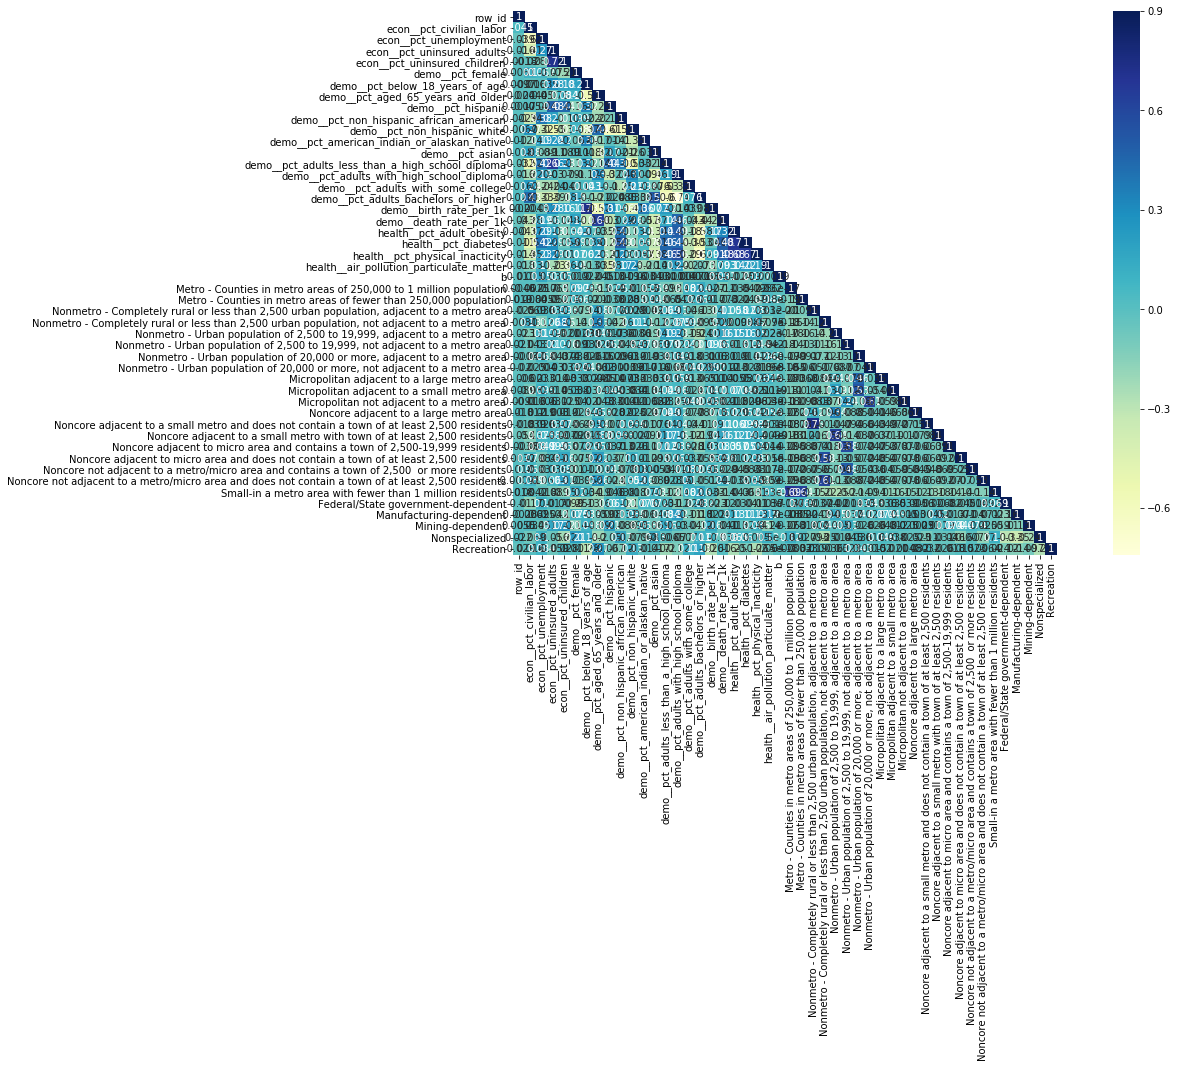

In [73]:
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [74]:
y_train.columns

Index(['row_id', 'heart_disease_mortality_per_100k'], dtype='object')

Before applying the parametric test we first visualise the given data to check whther the data is normally distributed.

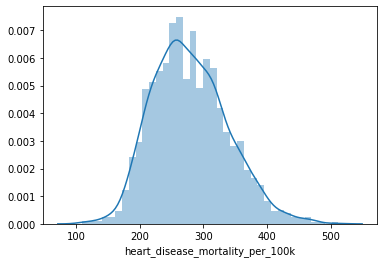

In [75]:
sn.distplot(y_train['heart_disease_mortality_per_100k'])

We can clearly see that the output data is normally distributed hence no need for variable transformation

# Now we develop the model

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lModel=LinearRegression()

In [78]:
Train=Train.drop(['row_id'],axis=1)

In [79]:
y_train=y_train.drop(['row_id'],axis=1)

In [80]:
lModel=(Train,y_train)

In [81]:
import statsmodels.api as sm
from scipy import stats

In [82]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [83]:
model1=sm.OLS(y_train,Train)

In [84]:
result=model1.fit()

In [85]:
print(result.summary())

                                        OLS Regression Results                                       
Dep. Variable:     heart_disease_mortality_per_100k   R-squared (uncentered):                   0.986
Model:                                          OLS   Adj. R-squared (uncentered):              0.986
Method:                               Least Squares   F-statistic:                              5216.
Date:                              Fri, 20 Mar 2020   Prob (F-statistic):                        0.00
Time:                                      00:17:09   Log-Likelihood:                         -15743.
No. Observations:                              3198   AIC:                                  3.157e+04
Df Residuals:                                  3154   BIC:                                  3.184e+04
Df Model:                                        44                                                  
Covariance Type:                          nonrobust                               

This the model validation using OLS


Below we make the prediction of the model

We can also implement the model using decision tree and similar algorithms.

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
dt_reg = DecisionTreeRegressor(max_depth=5)

In [88]:
dt_reg.fit(Train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

# Test Data
Before using the model to predict on the test data. We need to prepare the data i.e. make dummy variables, take care of the missing values, etc. 

In [89]:
test.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,"Nonmetro - Urban population of 20,000 or more,...",Micropolitan adjacent to a large metro area,Recreation,0.469,0.070,0.211,0.156,0.499,0.184,...,0.078,0.079,0.217,0.162,11.0,NaN,12.67,1569.0,1559.0,a
1,1,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.509,0.061,0.182,0.056,0.514,0.211,...,0.099,0.078,0.183,0.269,10.0,2.7,5.94,1709.0,1069.0,a
2,2,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Nonspecialized,0.479,0.042,0.294,0.131,0.514,0.245,...,0.094,0.078,0.105,0.275,10.0,2.9,19.87,1789.0,1990.0,a
3,3,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a small metro area,Nonspecialized,0.444,0.058,0.142,0.032,0.487,0.193,...,0.098,0.088,NaN,0.273,12.0,NaN,15.36,2860.0,2509.0,b
4,4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Mining-dependent,0.395,0.042,0.299,0.179,0.514,0.277,...,0.103,0.131,NaN,0.263,11.0,NaN,NaN,4639.0,2189.0,b


In [90]:
test.dtypes

row_id                                                int64
area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school

In [91]:
dummy=pd.get_dummies(test['yr'],drop_first=True)

In [92]:
test=pd.concat([test,dummy],axis=1)

In [93]:
test=test.drop(columns=['yr'])

In [94]:
dummy=pd.get_dummies(test['area__rucc'],drop_first=True)

In [95]:
test=pd.concat([test,dummy],axis=1)

In [96]:
test=test.drop(columns=['area__rucc'])

In [97]:
dummy=pd.get_dummies(test['area__urban_influence'],drop_first=True)

In [98]:
test=pd.concat([test,dummy],axis=1)

In [99]:
test=test.drop(columns=['area__urban_influence'])

In [100]:
dummy=pd.get_dummies(test['econ__economic_typology'],drop_first=True)

In [101]:
test=pd.concat([test,dummy],axis=1)

In [102]:
test=test.drop(columns=['econ__economic_typology'])

In [103]:
test.dtypes

row_id                                                                                                  int64
econ__pct_civilian_labor                                                                              float64
econ__pct_unemployment                                                                                float64
econ__pct_uninsured_adults                                                                            float64
econ__pct_uninsured_children                                                                          float64
demo__pct_female                                                                                      float64
demo__pct_below_18_years_of_age                                                                       float64
demo__pct_aged_65_years_and_older                                                                     float64
demo__pct_hispanic                                                                                    float64
demo__pct_

In [104]:
test.isnull().sum()

row_id                                                                                                   0
econ__pct_civilian_labor                                                                                 0
econ__pct_unemployment                                                                                   0
econ__pct_uninsured_adults                                                                               8
econ__pct_uninsured_children                                                                             8
demo__pct_female                                                                                         8
demo__pct_below_18_years_of_age                                                                          8
demo__pct_aged_65_years_and_older                                                                        8
demo__pct_hispanic                                                                                       8
demo__pct_non_hispanic_african_americ

In [105]:
Test=test.drop(['health__pct_adult_smoking',
                  'health__pct_excessive_drinking',
                  'health__homicides_per_100k',
                  'health__motor_vehicle_crash_deaths_per_100k',
                  'health__pop_per_dentist',
                  'health__pop_per_primary_care_physician','health__pct_low_birthweight'],axis=1)

In [106]:
Test.isnull().sum()

row_id                                                                                                 0
econ__pct_civilian_labor                                                                               0
econ__pct_unemployment                                                                                 0
econ__pct_uninsured_adults                                                                             8
econ__pct_uninsured_children                                                                           8
demo__pct_female                                                                                       8
demo__pct_below_18_years_of_age                                                                        8
demo__pct_aged_65_years_and_older                                                                      8
demo__pct_hispanic                                                                                     8
demo__pct_non_hispanic_african_american                

In [107]:
median(Test['econ__pct_uninsured_adults'])

0.1215

In [108]:
Test['econ__pct_uninsured_adults'].fillna(0.1215,inplace=True)

Test['econ__pct_uninsured_children'].fillna(median(Test['econ__pct_uninsured_children']),inplace=True)

Test['demo__pct_female'].fillna(median(Test['demo__pct_female']),inplace=True)

Test['demo__pct_below_18_years_of_age'].fillna(median(Test['demo__pct_below_18_years_of_age']),inplace=True)

Test['demo__pct_aged_65_years_and_older'].fillna(median(Test['demo__pct_aged_65_years_and_older']),inplace=True)

Test['demo__pct_hispanic'].fillna(median(Test['demo__pct_hispanic']),inplace=True)

Test['demo__pct_non_hispanic_african_american'].fillna(median(Test['demo__pct_non_hispanic_african_american']),inplace=True)

Test['demo__pct_non_hispanic_white'].fillna(median(Test['demo__pct_non_hispanic_white']),inplace=True)

In [109]:
Test['demo__pct_american_indian_or_alaskan_native'].fillna(median(Test['demo__pct_american_indian_or_alaskan_native']),inplace=True)

Test['demo__pct_asian'].fillna(median(Test['demo__pct_asian']),inplace=True)

Test['health__pct_adult_obesity'].fillna(median(Test['health__pct_adult_obesity']),inplace=True)

Test['health__pct_diabetes'].fillna(median(Test['health__pct_diabetes']),inplace=True)

Test['health__pct_physical_inacticity'].fillna(median(Test['health__pct_physical_inacticity']),inplace=True)

Test['health__air_pollution_particulate_matter'].fillna(median(Test['health__air_pollution_particulate_matter']),inplace=True)

In [110]:
Test.isnull().sum()

row_id                                                                                                0
econ__pct_civilian_labor                                                                              0
econ__pct_unemployment                                                                                0
econ__pct_uninsured_adults                                                                            0
econ__pct_uninsured_children                                                                          0
demo__pct_female                                                                                      0
demo__pct_below_18_years_of_age                                                                       0
demo__pct_aged_65_years_and_older                                                                     0
demo__pct_hispanic                                                                                    0
demo__pct_non_hispanic_african_american                         

In [111]:
Test=Test.drop(['row_id'],axis=1)

In [112]:
predict = dt_reg.predict(Test)

In [113]:
submission = pd.DataFrame()

In [114]:
submission['heart_disease_mortality_per_100k'] = predict

In [115]:
submission.to_csv('Submission_DecisionTree.csv', header=True, index=False)

In [116]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF=RandomForestClassifier(n_estimators=250,criterion='entropy',max_depth=30,max_features=8,min_samples_split=10,
                                     random_state=44)

classifier_RF.fit(Train,y_train)

F:\Python\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=44, verbose=0,
                       warm_start=False)

In [117]:
y_pred_RF=classifier_RF.predict(Test)

In [118]:
submission = pd.DataFrame()

In [119]:
submission['heart_disease_mortality_per_100k'] = y_pred_RF

In [120]:
submission.to_csv('Submission_RandomForrest.csv', header=True, index=False)

In [121]:
train=pd.DataFrame()

In [122]:
train=Train

In [123]:
train.to_csv('Train Data.csv',header=True, index=False)

In [124]:
test=pd.DataFrame()

In [125]:
test=Test

In [126]:
test.to_csv('Test Data.csv',header=True, index=False)

In [127]:
import pandas as pd

In [128]:
x=pd.read_csv("C:\\Users\\WIN\\Desktop\\Welingkar\\Internshala Data Science\\Assignment 4 (3)\\train.csv")

In [129]:
x.shape

(12980, 12)